# 一、作业要求


● 使用sklearn实现SVM、SVR
● 实现基本的坐标下降算法（建议从线性方程组问题开始）
● 数据要求：与神经网络相同


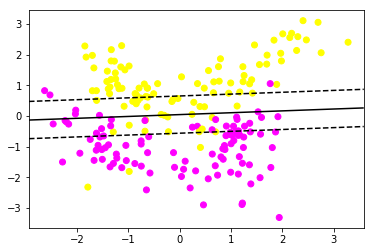

In [2]:
#1.使用sklearn实现SVM
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,n_classes=2)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(x,y)
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],50)
    y = np.linspace(xlim[0],ylim[1],50)
    X,Y  = np.meshgrid(x,y)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=1,linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s = 300,linewidth=2,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(x[:,0],x[:,1],c=y,cmap='spring')
plot_svc_decision_function(model)
plt.show()

C:\Users\Letter\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


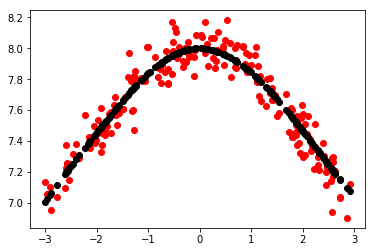

In [2]:
#2.实现SVR
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
x = np.linspace(-3,3,1000)
y = [np.sin(i)/i + 7 + 0.1 * np.random.normal(0,1) for i in x]
x = np.array([x]).T
y = np.array([y]).T
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_predict = svr.fit(x_train, y_train).predict(x_test)
plt.plot(x_test,y_test,'ro')
plt.plot(x_test,y_predict,'ko')
plt.show()

In [3]:
#坐标下降算法
import numpy as np
def coordinate_descent_method(A, b, x0,epsilon):
    AT = A.T
    x = x0
    k = 0
    while True:
        x_save = x.copy()
        for i in range(len(x)):
            A_i = np.delete(A, i, axis=1)
            x_i = np.delete(x, i, axis=0)
            b_Ax_i = b - np.dot(A_i, x_i)
            x[i] = np.dot(b_Ax_i, AT[i]) / np.dot(AT[i], AT[i])
        e = b - np.dot(A, x)
        if np.dot(e, e) < epsilon:
            break
        k = k + 1
    return x, k
A = np.array([[1,2,1], [2,1,3], [0,1,2]])
b = np.array([-1,3,4])
x0 = np.array([0,0,0.])
x, k = coordinate_descent_method(A, b, x0, 1e-3)
print("x = {},迭代次数 = {}".format(x, k))

x = [-1.72448871 -0.84248986  2.42634643],迭代次数 = 13


# 坐标下降 原理

目标函数：$$f(x)=g(x)+\sum_{i=1}^{n}h_i(x_i)$$
坐标下降：$$ x_1^{(k)}\in \mathop{argmin}\limits_{x_1}f(x_1,x_2^{(k-1)},x_3^{(k-1)},\dots,x_n^{(k-1)})$$
$$x_2^{(k)}\in \mathop{argmin}\limits_{x_2}f(x_1^{(k)},x_2,x_3^{(k-1)},\dots,x_n^{(k-1)})$$
$$x_3^{(k)}\in \mathop{argmin}\limits_{x_3}f(x_1^{(k)},x_2^{(k)},x_3,\dots,x_n^{(k-1)})$$
$$\dots$$
$$x_n^{(k)}\in \mathop{argmin}\limits_{x_n}f(x_1^{(k)},x_2^{(k)},x_3^{(k)},\dots,x_n)$$


线性方程组：$$Ax = b$$
定义误差：$$e(x)=b-Ax$$
令：$$x_{i-} = [x_1,x_2,...,x_{i-1},x_{i+1},...,x_n]^T$$
   $$A_{i-} = [A_1,A_2,...,A_{i-1},A_{i+1},...,A_n]^T$$
则：$$Ax = A_ix_i + A_{i-}x_{i-}$$
移向： $$e(x)=b-A_ix_i-A_{i-}x_{i-}$$
中间方程:$$A_ix_i^{k+1}=b-A_{i-}x_{i-}^k$$
迭代格式：$$x_i^{k+1}=\frac{A_i^T(b-A_{i-}x_{i-}^k)}{\|A_i\|^2}$$
当迭代误差$\|e(x)\|^2<\epsilon$时迭代结束   